## **Data Preparation**

In [0]:
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 10, 9]

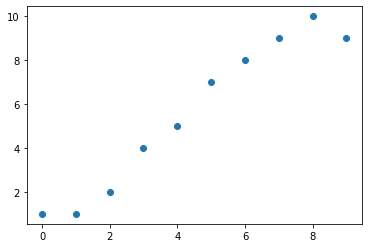

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

## **Model(Hypothesis) Define**

In [0]:
class H():
  
    def __init__(self, w): 
        self.w = w
    
    def forward(self, x):
        return self.w * x     # H(x) = Wx
    

## **Cost(Loss) Function**

In [0]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error = error / len(X)
    return error


##**Checking cost function**##

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3580.2, 3267.925, 2969.9, 2686.125, 2416.6, 2161.325, 1920.3, 1693.525, 1481.0, 1282.725, 1098.7, 928.925, 773.4, 632.125, 505.1, 392.325, 293.8, 209.525, 139.5, 83.725, 42.2, 14.925, 1.9, 3.125, 18.6, 48.325, 92.3, 150.525, 223.0, 309.725, 410.7, 525.925, 655.4, 799.125, 957.1, 1129.325, 1315.8, 1516.525, 1731.5, 1960.725]


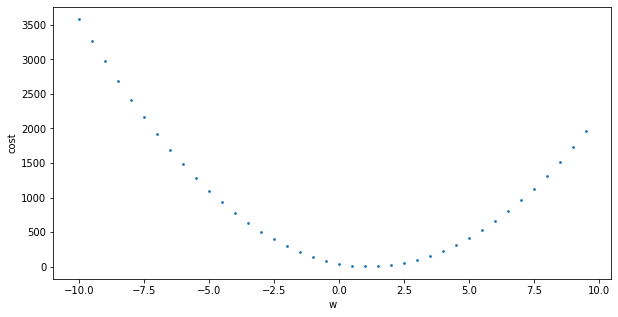

In [6]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w)
print(list_c) 

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

##**Gradient Decent**

In [0]:
def cal_grad(w, cost): 
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001 
    h = H(w+eps) 
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost): 
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c


##**Running case: Testing two different gradient decent models**

1.207012543859841 0.6785964919405698 1.207017543859649 0.6785964912280703


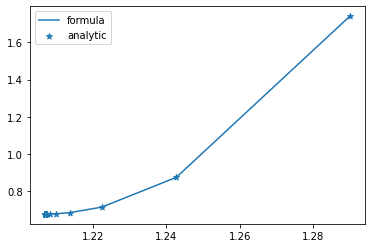

In [8]:
# ===== Initializing weights (w) ==== #
w1 = 1.4
w2 = 1.4

# ===== Learning rate ===== #

lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): 
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) 

plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.plot(list_w2, list_c2, label='formula')
plt.legend()

##**Checking results: Best fit**

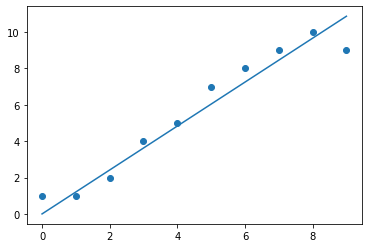

In [11]:
import numpy as np
x_grid=np.arange(10)
pred_y1 = w1*x_grid
plt.plot(X,pred_y1)
plt.scatter(X,Y)
plt.show()